In [2]:
import pandas as pd

In [3]:
dfs = {
    "Liverpool": "https://fbref.com/en/squads/822bd0ba/2024-2025/matchlogs/c9/schedule/Liverpool-Scores-and-Fixtures-Premier-League",
    "Arsenal": "https://fbref.com/en/squads/18bb7c10/2024-2025/matchlogs/c9/schedule/Arsenal-Scores-and-Fixtures-Premier-League",
    "Nottingham Forest": "https://fbref.com/en/squads/e4a775cb/2024-2025/matchlogs/all_comps/schedule/Nottingham-Forest-Scores-and-Fixtures-Premier-League",
    "Chelsea": "https://fbref.com/en/squads/cff3d9bb/2024-2025/matchlogs/all_comps/schedule/Chelsea-Scores-and-Fixtures-Premier-League",
    "Manchester City": "https://fbref.com/en/squads/b8fd03ef/2024-2025/matchlogs/all_comps/schedule/Manchester-City-Scores-and-Fixtures-Premier-League",
    "Newcastle United": "https://fbref.com/en/squads/b2b47a98/2024-2025/matchlogs/c9/schedule/Newcastle-United-Scores-and-Fixtures-Premier-League",
    "Bournemouth": "https://fbref.com/en/squads/4ba7cbea/2024-2025/matchlogs/c9/schedule/Bournemouth-Scores-and-Fixtures-Premier-League",
    "Aston Villa": "https://fbref.com/en/squads/8602292d/2024-2025/matchlogs/c9/schedule/Aston-Villa-Scores-and-Fixtures-Premier-League",
    "Fulham": "https://fbref.com/en/squads/fd962109/2024-2025/matchlogs/c9/schedule/Fulham-Scores-and-Fixtures-Premier-League",
    "Brighton": "https://fbref.com/en/squads/d07537b9/2024-2025/matchlogs/c9/schedule/Brighton-and-Hove-Albion-Scores-and-Fixtures-Premier-League",
    "Brentford": "https://fbref.com/en/squads/cd051869/2024-2025/matchlogs/c9/schedule/Brentford-Scores-and-Fixtures-Premier-League",
    "Crystal Palace": "https://fbref.com/en/squads/47c64c55/2024-2025/matchlogs/c9/schedule/Crystal-Palace-Scores-and-Fixtures-Premier-League",
    "Manchester United": "https://fbref.com/en/squads/19538871/2024-2025/matchlogs/c9/schedule/Manchester-United-Scores-and-Fixtures-Premier-League",
    "Spurs": "https://fbref.com/en/squads/361ca564/2024-2025/matchlogs/c9/schedule/Tottenham-Hotspur-Scores-and-Fixtures-Premier-League",
    "West Ham": "https://fbref.com/en/squads/7c21e445/2024-2025/matchlogs/c9/schedule/West-Ham-United-Scores-and-Fixtures-Premier-League",
    "Everton": "https://fbref.com/en/squads/d3fd31cc/2024-2025/matchlogs/c9/schedule/Everton-Scores-and-Fixtures-Premier-League",
    "Wolves": "https://fbref.com/en/squads/8cec06e1/2024-2025/matchlogs/c9/schedule/Wolverhampton-Wanderers-Scores-and-Fixtures-Premier-League",
    "Leicester": "https://fbref.com/en/squads/a2d435b3/2024-2025/matchlogs/c9/schedule/Leicester-City-Scores-and-Fixtures-Premier-League",
    "Ipswich": "https://fbref.com/en/squads/b74092de/2024-2025/matchlogs/c9/schedule/Ipswich-Town-Scores-and-Fixtures-Premier-League",
    "Southampton": "https://fbref.com/en/squads/33c895d4/2024-2025/matchlogs/c9/schedule/Southampton-Scores-and-Fixtures-Premier-League"
}

In [4]:
# Transform each URL into a dataframe
dfs = {team: pd.read_html(url, attrs={"id":"matchlogs_for"})[0] for team, url in dfs.items()}

In [5]:
# Remove the rows where result is NaN
dfs = {team: df[df['Result'].notna()] for team, df in dfs.items()}

In [6]:
dfs['Liverpool']

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,2024-08-17,12:30,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,0.5,62.0,30014.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tim Robinson,Match Report,NaN
1,2024-08-25,16:30,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,2.5,0.5,62.0,60017.0,Virgil van Dijk,4-2-3-1,4-4-2,Stuart Attwell,Match Report,NaN
2,2024-09-01,16:00,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,1.4,47.0,73738.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Anthony Taylor,Match Report,NaN
3,2024-09-14,15:00,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,0.4,68.0,60344.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Michael Oliver,Match Report,NaN
4,2024-09-21,15:00,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,2.0,1.1,58.0,60347.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tony Harrington,Match Report,NaN
5,2024-09-28,17:30,Matchweek 6,Sat,Away,W,2.0,1.0,Wolves,2.5,0.6,55.0,31413.0,Virgil van Dijk,4-2-3-1,4-1-4-1,Anthony Taylor,Match Report,NaN
6,2024-10-05,12:30,Matchweek 7,Sat,Away,W,1.0,0.0,Crystal Palace,1.4,0.6,68.0,25185.0,Virgil van Dijk,4-2-3-1,3-4-3,Simon Hooper,Match Report,NaN
7,2024-10-20,16:30,Matchweek 8,Sun,Home,W,2.0,1.0,Chelsea,1.9,1.0,43.0,60277.0,Virgil van Dijk,4-2-3-1,4-2-3-1,John Brooks,Match Report,NaN
8,2024-10-27,16:30,Matchweek 9,Sun,Away,D,2.0,2.0,Arsenal,0.8,0.9,55.0,60383.0,Virgil van Dijk,4-2-3-1,4-4-2,Anthony Taylor,Match Report,NaN
9,2024-11-02,15:00,Matchweek 10,Sat,Home,W,2.0,1.0,Brighton,1.6,1.0,49.0,60331.0,Virgil van Dijk,4-2-3-1,4-4-2,Tony Harrington,Match Report,NaN


In [7]:
# First, let's create a function to determine if the team with more possession won
def analyze_possession_result(row, possession_diff_threshold):
    # If possession is greater than 50%, team had more possession
    possession_diff = abs(row['Poss'] - 50)

    if possession_diff < possession_diff_threshold:
        return None
    
    # Determine if team won
    had_more_possession = row['Poss'] > 50
    won_game = row['Result'] == 'W'
    drew_game = row['Result'] == 'D'
    
    # Return result
    if drew_game:
        return 'Draw'
    return 'Won' if had_more_possession == won_game else 'Lost'

# Create a list to store all possession-result pairs
possession_results = []
possession_diffs = []

# First pass to collect possession differences
for team, df in dfs.items():
    if 'Poss' in df.columns:
        valid_matches = df[df['Poss'].notna()]
        possession_diffs.extend(abs(valid_matches['Poss'] - 50).tolist())

possession_diff_threshold = pd.Series(possession_diffs).quantile(0.1)

# Second pass to analyze matches
for team, df in dfs.items():
    if 'Poss' in df.columns:
        valid_matches = df[df['Poss'].notna()]
        results = valid_matches.apply(analyze_possession_result, possession_diff_threshold=possession_diff_threshold, axis=1)
        possession_results.extend([r for r in results if r is not None])

/var/folders/pw/3lgbkgk149n6t5s78s_4n0rc0000gn/T/ipykernel_25173/886213565.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_matches['possession_result'] = valid_matches.apply(analyze_possession_result, axis=1)


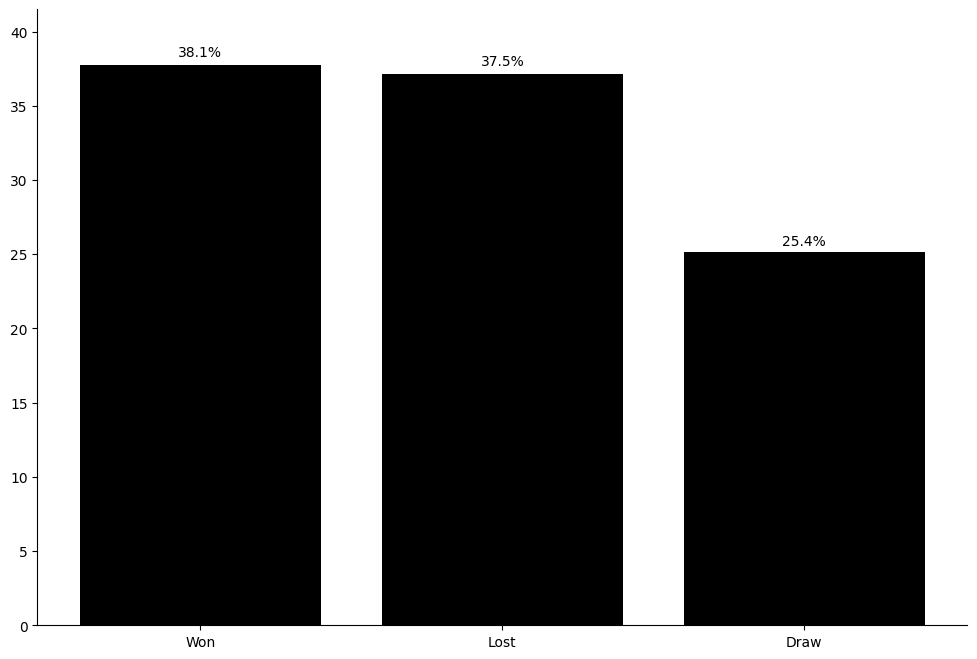

In [18]:
# Plot the dataframe
import matplotlib.pyplot as plt

# Create a DataFrame with the results and calculate percentages
results_df = pd.DataFrame(possession_results, columns=['Outcome'])
results_summary = results_df['Outcome'].value_counts()
results_percentages = results_df['Outcome'].value_counts(normalize=True) * 100

# Create the bar plot
plt.style.use('default')
plt.figure(figsize=(12, 8))
bars = plt.bar(results_percentages.index, results_percentages.values, color='black')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height() * 1.01
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Customize the plot
plt.ylim(0, max(results_percentages.values) * 1.1)  # Add 10% padding above bars

# Remove the box on top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Make the axes white including text and ticks
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(colors='black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

# Save figure before showing it
plt.savefig('output.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Clear the current figure to avoid duplicate saves
plt.close()